In [1]:
import os
import json
# change to results folder
os.environ['nnUNet_results'] = f'/home/nathan/Desktop/nnUNet/dataset/nnUNet_results'
os.environ['nnUNet_preprocessed'] = 'none'
os.environ['nnUNet_raw'] = 'none'

from nnunetv2.inference.predict_from_raw_data import predict_entry_point, predict_using_numpy

In [2]:
# only necessary for prediction with numpy files
with open('properties.json', 'r') as f:
    properties = json.load(f)

In [3]:
import SimpleITK as sitk
import numpy as np
input = sitk.GetArrayFromImage(sitk.ReadImage("/home/nathan/Desktop/nnUNet/dataset/nnUNet_results/Dataset014_addedArt2/nnUNetTrainer__nnUNetPlans__2d/fold_0/validation/B_02_postCT_2_1_005.nii.gz"))
input = np.expand_dims(input, axis=0)
# input must be a list of numpy arrays with size (1, 256, 256)
input = [input for _ in range(50)]

predictor = predict_using_numpy(input, '014', properties, c='2d', npp=2, nps=1)


#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################



In [4]:
# grab masks
masks = predictor.grab_masks()

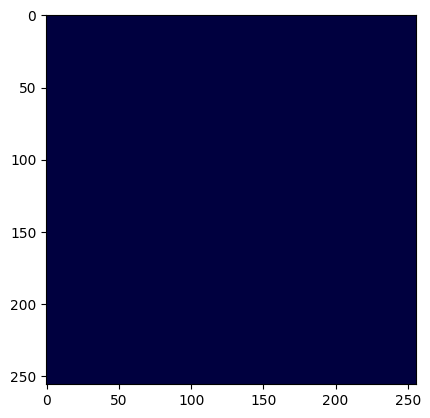

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(input[10][0], cmap='gray')
plt.imshow(masks[10][0], cmap='jet', alpha=0.5)
plt.show()